In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/sample_submission.csv
/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/test_atlantis_hidden.csv
/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/atlantis_citizens_final.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/atlantis_citizens_final.csv")
print(df.head(10))

#loading the dataframe and printing first 10 rows

  Citizen_ID       Diet_Type    District_Name Occupation  Wealth_Index  \
0  CIT_15935  Exotic Imports      Coral Slums     Scribe        1491.0   
1  CIT_11623         Seafood      Coral Slums     Fisher        1596.0   
2   CIT_8026         Seafood    Mariana Plaza    Warrior        3921.0   
3   CIT_0492  Exotic Imports      Deep Trench     Fisher           NaN   
4   CIT_0275         Seaweed      Deep Trench    Warrior       25985.0   
5   CIT_7475         Seaweed    Mariana Plaza    Warrior        6173.0   
6  CIT_17545  Exotic Imports      Coral Slums     Scribe        1506.0   
7   CIT_5234  Exotic Imports  The Golden Reef    Warrior       19054.0   
8  CIT_10281         Seafood      Coral Slums      Miner        1890.0   
9  CIT_14760         Seafood  The Golden Reef      Miner        2597.0   

   House_Size_sq_ft  Life_Expectancy Vehicle_Owned  Work_District  Bio_Hash  
0             100.0             42.0   Fin Bicycle  Mariana Plaza  b81cb8ce  
1             100.0          

In [4]:
#we create a commute_out column
df["commute_out"] = df["District_Name"] != df["Work_District"]

#we groupby district name and see which district has the highers commuter sort them by their proportion and 
#express it as a percentage
commute_stats = df.groupby("District_Name")["commute_out"].mean().sort_values(ascending=False) * 100
print(commute_stats)



occupation_commute = df[df["commute_out"]].groupby(["District_Name","Occupation"]).size().unstack(fill_value=0)
occupation_commute_pct = occupation_commute.div(occupation_commute.sum(axis=1), axis=0) * 100
print(occupation_commute_pct)

District_Name
The Golden Reef    72.874662
Coral Slums        66.474728
Deep Trench        63.266610
Mariana Plaza      63.245670
Name: commute_out, dtype: float64
Occupation          Fisher   Merchant      Miner     Scribe    Warrior
District_Name                                                         
Coral Slums      31.472570  12.800770  30.510106  13.185756  12.030799
Deep Trench      29.653315  15.382026  10.804443  14.978122  29.182094
Mariana Plaza    14.300203   9.432049  15.162272  19.574037  41.531440
The Golden Reef  10.325157  42.241871  24.843126  12.207644  10.382202


We see a clear connection and a very vivid data 

* Golden reef has the highest number of residents who commute out for work 
* now grouping by district we see that in coral slums the highest commuters are fisher and miner
* in deep trench the highest commuter are fisher and warrior
* the highest commuter is warrior
* highest commuter is merchant

that means jusding by the district they say we can have a rough idea of the occupation of the person if we know whether he commutes out or not

Post Model Training:
although our eda did show some relation between commuting out data and occupation but when fed directly into model it showed a slight dip in the F1 macro score this cane be because the feature overlapped with some other feature or was just too generic and cause overfitting of our model

# Compare the wealthiest district to the poorest district.How many times wealthier is the average citizen in the richest district compared to the poorest?

In [5]:
district_means = df.groupby("District_Name")["Wealth_Index"].mean().sort_values()

poorest_district = district_means.index[0]
wealthiest_district = district_means.index[-1]

poorest_value = district_means.iloc[0]
wealthiest_value = district_means.iloc[-1]

ratio = wealthiest_value / poorest_value

print(poorest_district, poorest_value)
print(wealthiest_district, wealthiest_value)
print(ratio)

Coral Slums 3371.414207275223
The Golden Reef 18726.90965593785
5.554615512839325


*we see that the wealthiest district is golden reef which is 5.5 times wealthier than the poorest which is Coral Slums*

# Is there a significant correlation between House Size and Life Expectancy?

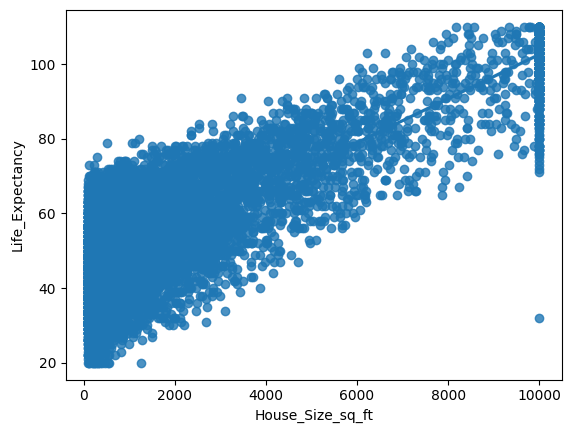

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x="House_Size_sq_ft", y="Life_Expectancy", data=df)
plt.show()

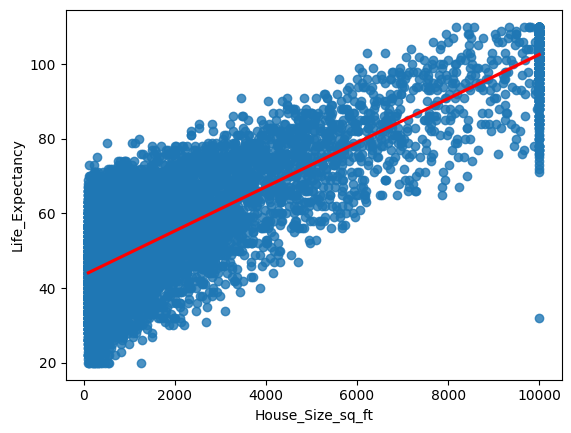

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    x="House_Size_sq_ft",
    y="Life_Expectancy",
    data=df,
    line_kws={"color": "red"}
)

plt.show()


we see a very clear relation between life_expectancy and House_size_sq_ft that complies very well with the real world scenarios where people with bigger houses prove that they are economically in a stronger position allowing them to earn better and have access to better health care

# Financial Income V/S Diet 

In [8]:
diet_wealth = df.groupby("Diet_Type")["Wealth_Index"].mean().sort_values(ascending=False)
print(diet_wealth)


Diet_Type
Exotic Imports    10366.435328
Seafood            9966.829105
Seaweed            8261.324093
Name: Wealth_Index, dtype: float64


We see something that again matches our expectation the average of the wealth index for every food category, expensive food like exotic imports have higher mean wealth index something that complies with our common sense

# Diet Type V/S occupation

In [9]:
diet_occupation = df.groupby(["Diet_Type", "Occupation"]).size().unstack(fill_value=0)

print(diet_occupation)


Occupation      Fisher  Merchant  Miner  Scribe  Warrior
Diet_Type                                               
Exotic Imports    1057      1198    999     830     1125
Seafood           1029      1172   1004     860     1217
Seaweed           1050      1165   1025     831     1189


In [10]:
occupation_diet = df.groupby(["Occupation","Diet_Type"]).size().unstack(fill_value=0)

occupation_diet_pct = occupation_diet.div(occupation_diet.sum(axis=1), axis=0) * 100

print(occupation_diet_pct)


Diet_Type   Exotic Imports    Seafood    Seaweed
Occupation                                      
Fisher           33.705357  32.812500  33.482143
Merchant         33.889675  33.154173  32.956153
Miner            32.992074  33.157199  33.850727
Scribe           32.923443  34.113447  32.963110
Warrior          31.860663  34.466157  33.673180


we notice the proportions are very close together so ideally they should not be uselful in training our model

Post Model Training:
while doing our selective eda during model training we still found that this feature of diet type against occupation held no data however removing it from our model caused a dip meaning that it was connecting to another feaature that provided importance to our model

# Vehicle Owned V/S occupation

In [11]:
pd.crosstab(df["Occupation"], df["Vehicle_Owned"], normalize="index")

Vehicle_Owned,Fin Bicycle,No Vehicle,Royal Submarine,Sea Scooter,Submarine
Occupation,,,,,
Fisher,0.262436,0.229273,0.000957,0.417411,0.089923
Merchant,0.175955,0.271004,0.023479,0.301273,0.228289
Miner,0.242404,0.256605,0.003963,0.360964,0.136063
Scribe,0.208647,0.294328,0.003173,0.338358,0.155494
Warrior,0.226848,0.268196,0.003965,0.351459,0.149533


we see that every occupation has some sort of a favorite vehicle, for fishers it is the fin cycle or being no vehice
for merchants its most not to choose a vehicle
for miners its either no vehicle or the fin cycle
and for scribes and warriors its also the same
proving that fin cycle is the most sought after vehicle in atlantis

# District Name V/S occupation

In [12]:
ct = pd.crosstab(df["Occupation"], df["District_Name"], normalize="index")
ct

District_Name,Coral Slums,Deep Trench,Mariana Plaza,The Golden Reef
Occupation,,,,
Fisher,0.294962,0.452487,0.100128,0.152423
Merchant,0.082885,0.145969,0.086563,0.684583
Miner,0.421070,0.151255,0.107001,0.320674
Scribe,0.122174,0.192781,0.499405,0.185641
Warrior,0.092042,0.514585,0.259133,0.134240


the numbers do vary a lot showing sufficient gaps but a more visual understanding would help with the analysis

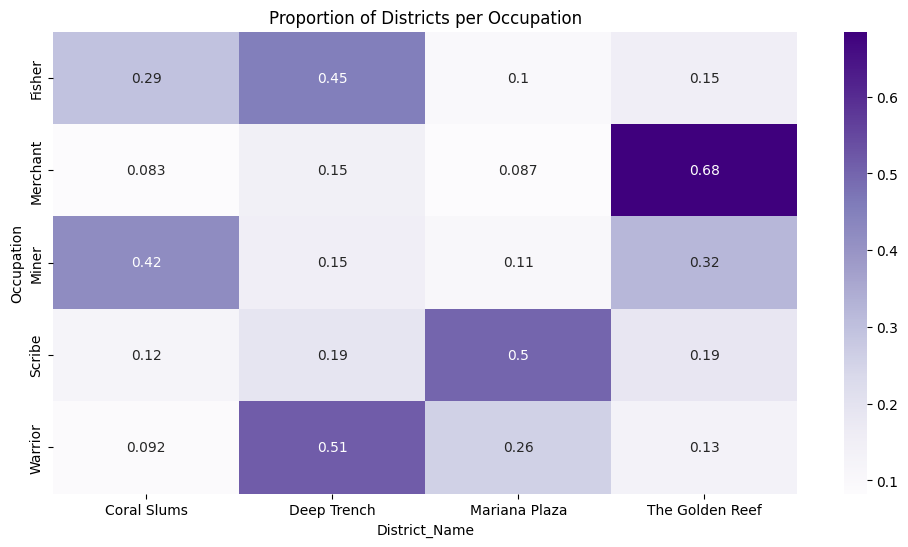

In [13]:
#district names being studied 
ct = pd.crosstab(df["Occupation"], df["District_Name"], normalize="index")
plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=True, cmap="Purples")
plt.title("Proportion of Districts per Occupation")
plt.show()


A very clear distinction arises proving that district name is a very important feature
* warriors majorls reside in deep trenches
* scribes in mariana plaza
* miners in coral slums
* merchants in golden reef
* and fishers in deep trenches

# Work District V/S occupation

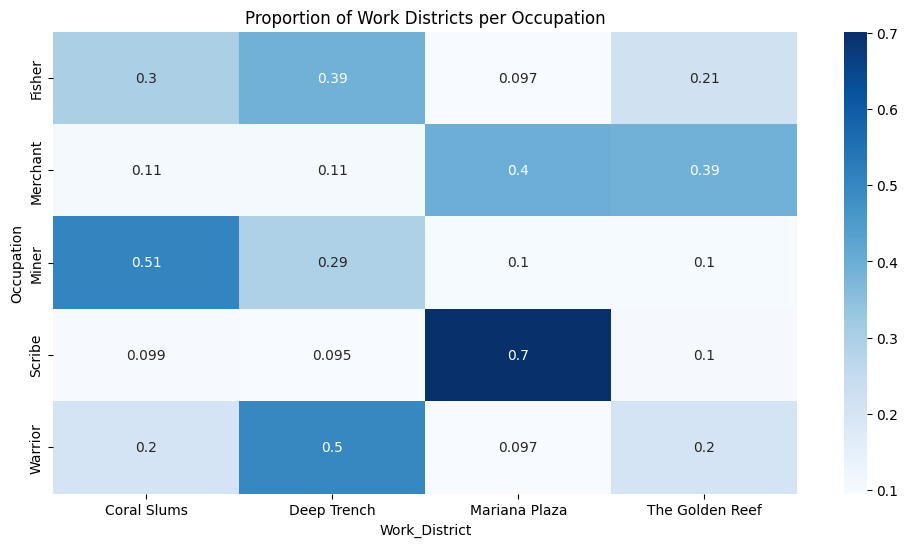

In [14]:
#lets run the similar heat map testing through work district
ct = pd.crosstab(df["Occupation"], df["Work_District"], normalize="index")
plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=True, cmap="Blues")
plt.title("Proportion of Work Districts per Occupation")
plt.show()

we see a similar pattern,
* fishers maorl are in all districts except mariana plaza
* merchants are majorly in golden reff and mariana plaza
* miners are in coral slums
* scribes in mariana plaza
* warriors in deep trenches


# Wealth Index V/S Occupation

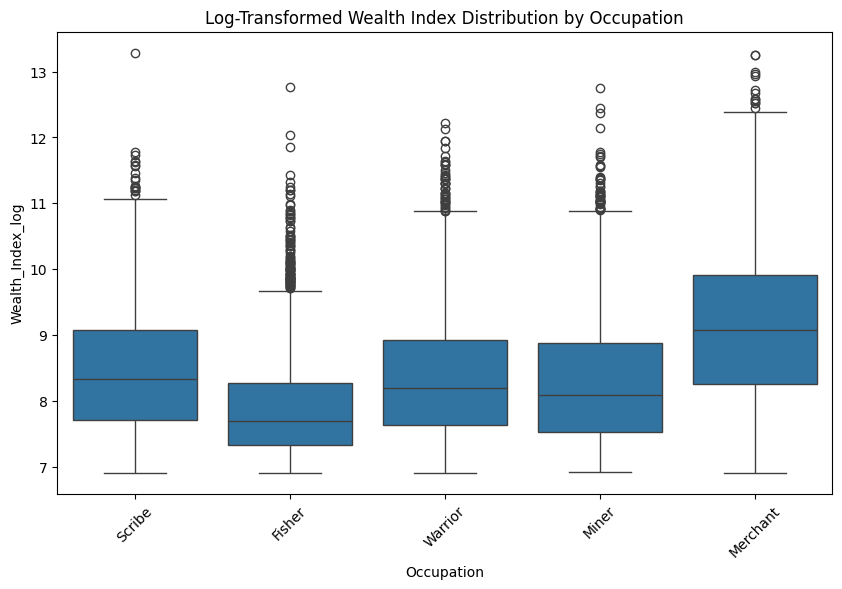

In [15]:
df["Wealth_Index_log"] = np.log1p(df["Wealth_Index"])

plt.figure(figsize=(10,6))
sns.boxplot(x="Occupation", y="Wealth_Index_log", data=df)
plt.title("Log-Transformed Wealth Index Distribution by Occupation")
plt.xticks(rotation=45)
plt.show()


We clearly see the pattern here though tiny all the occupations differ in their median welth index

# Bio_Hash

In [19]:
df["alpha_count"] = df["Bio_Hash"].str.count(r"[A-Za-z]")

print(df[["Bio_Hash", "alpha_count"]].head())


   Bio_Hash  alpha_count
0  b81cb8ce            5
1  72f48eef            4
2  0abde296            4
3  8055fc9e            3
4  c77829e2            2


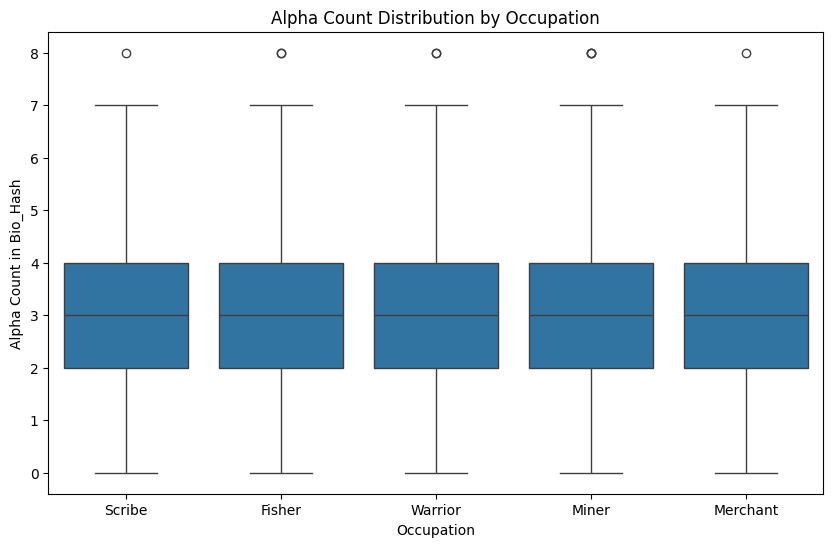

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x="Occupation", y="alpha_count", data=df)

plt.title("Alpha Count Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Alpha Count in Bio_Hash")
plt.show()


Very interesting thing to note is that the number of alphabets in the bio_hash for each occupation shows the same distribution

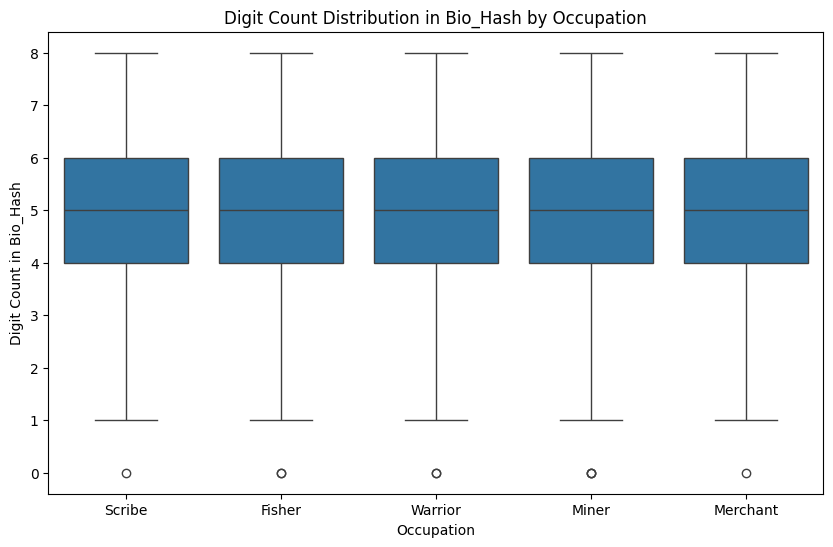

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


df["digit_count"] = df["Bio_Hash"].str.count(r"\d")

plt.figure(figsize=(10,6))
sns.boxplot(x="Occupation", y="digit_count", data=df)

plt.title("Digit Count Distribution in Bio_Hash by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Digit Count in Bio_Hash")
plt.show()


The same uniform distribution followed by the number of digits in each Bio_Hash

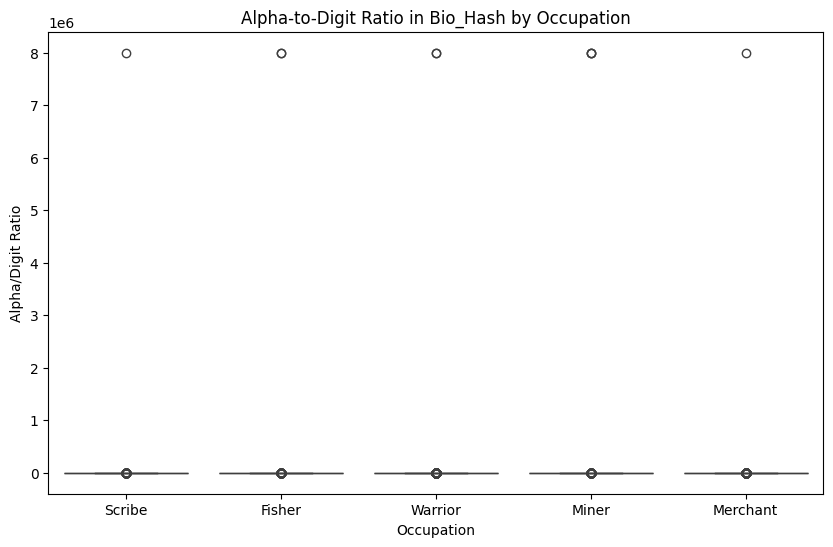

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


df["ratio"] = df["alpha_count"] / (df["digit_count"] + 1e-6)


plt.figure(figsize=(10,6))
sns.boxplot(x="Occupation", y="ratio", data=df)

plt.title("Alpha-to-Digit Ratio in Bio_Hash by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Alpha/Digit Ratio")
plt.show()


In [30]:
import numpy as np

df["log_ratio"] = np.log(df["ratio"])

print(df[["ratio", "log_ratio"]].head())


      ratio     log_ratio
0  1.666666  5.108253e-01
1  1.000000 -2.500000e-07
2  1.000000 -2.500000e-07
3  0.600000 -5.108258e-01
4  0.333333 -1.098612e+00


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


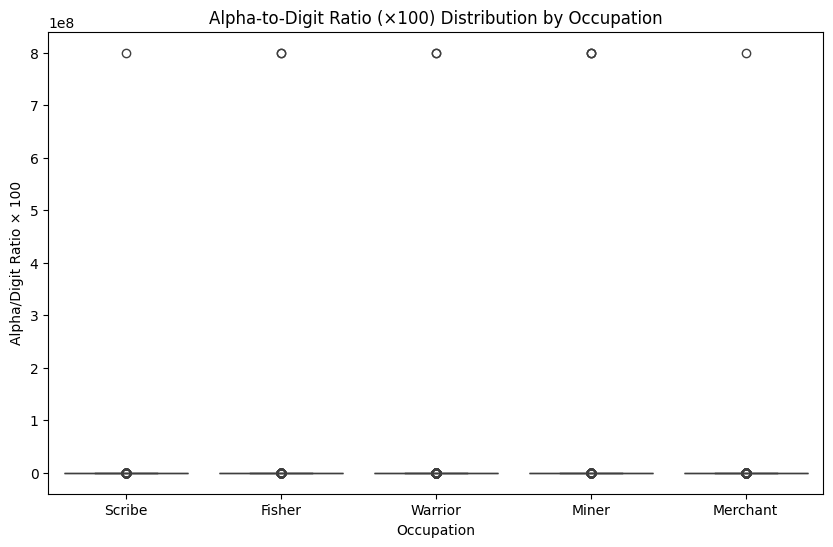

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Occupation", y="ratio_scaled", data=df)

plt.title("Alpha-to-Digit Ratio (×100) Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Alpha/Digit Ratio × 100")
plt.show()


We are unable to find a link that connects each hash_code pattern to some of the occupation

Even with many repeated attempts no clear signal was found between the occupations and the Bio_Hash something i regret is being unable to find a distinct connection as such my model stands with an f1 score of 0.633

# End of Our EDA